[1075.15035632 1089.61391544 1103.59700511 1098.05267405 1091.54741413
 1088.97826334 1087.39178648 1084.32544996 1078.22010273 1073.89663487
 1071.56092868 1091.49586704 1109.81967891 1113.93048724 1128.85203421
 1132.82459303 1131.26606473 1128.93947451 1130.63843686 1149.38715065
 1148.22709451 1158.16494328 1154.70133483 1162.5679061  1183.20432459
 1195.17268627 1189.29271706 1201.32991816 1206.75839603 1205.02350957
 1195.8054774  1201.22026209 1199.99268062 1135.42295302 1082.97666722] 0.9776805867576008 35


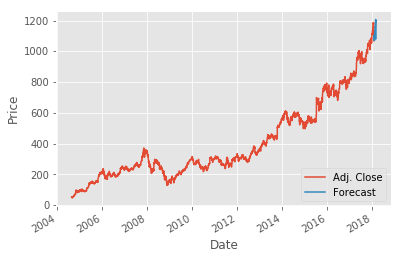

                     Adj. Close  HL_Pct  OC_Pct  Adj. Volume  label  \
Date                                                                  
2018-03-08 08:00:00         NaN     NaN     NaN          NaN    NaN   
2018-03-09 08:00:00         NaN     NaN     NaN          NaN    NaN   
2018-03-10 08:00:00         NaN     NaN     NaN          NaN    NaN   
2018-03-11 08:00:00         NaN     NaN     NaN          NaN    NaN   
2018-03-12 08:00:00         NaN     NaN     NaN          NaN    NaN   

                        Forecast  
Date                              
2018-03-08 08:00:00  1195.805477  
2018-03-09 08:00:00  1201.220262  
2018-03-10 08:00:00  1199.992681  
2018-03-11 08:00:00  1135.422953  
2018-03-12 08:00:00  1082.976667  


In [15]:
import quandl as ql 
import sklearn
import pandas as pd
import math, datetime
import numpy as np # no problem! :D
from sklearn import preprocessing, model_selection, svm # Getting features to be nice and pretty, normalsing data, shuffle and split data so our samples aren't biased from order effects, svm is useful with regressions
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt #graphing
from matplotlib import style # make it look nice
style.use ('ggplot')
# Using continous data to come up with a best fit line to explain the relationship between the dependent variable and indepedent variables(s)
# Stock prices example

# the following are features not labels! 

df= ql.get("WIKI/GOOGL") # creates a dataframe consisting of Google stock prices, which will be the data used for our regression Is Google a good stock to buy or not?! Let's see!
#print (df.head()) # Print out a little summary of the dataset we'll be using. Also helpful to see which "features" the data presents
df [["Adj. Open","Adj. High","Adj. Low","Adj. Close"]] # Creates a new df of selected values from the previous df
df ["HL_Pct"] = (df["Adj. High"]- df["Adj. Low"] / df["Adj. Low"] *100.0) # calculate the percentage change from adjusted high variable from adjusted low
df ["OC_Pct"] = (df["Adj. Close"]- df["Adj. Open"] / df["Adj. Open"] *100.0) # now calculating the percentage change from closing value from opening value

df = df[["Adj. Close","HL_Pct", "OC_Pct", "Adj. Volume"]] # Defining the columns that will be actually needed for the regression
#print (df.head()) # Helps keeps me honest by seeing exactly what i'm defining in previous lines.

forecast_col = "Adj. Close"
df.fillna(-99999, inplace= True) # Replacing NAN data, Especially important in machine learning

forecast_out = int(math.ceil (0.01*len(df))) #Forecasting out 1% of the data. math.ceil will round everything up to nearest whole number (integer not float)

df["label"] = df[forecast_col].shift(-forecast_out)# Shifting future rows of adj close price up the spreadsheet and 10% into the future

#print (df.head()) #again checking to see if i did't muck up the code and everything prints out as expected, should see an increase in stock price from adj close to the 1% in the future label


X = np.array(df.drop (["label"],1)) # X will be our features variable, and dropping the word 'label' from our new numpy array
Y = np.array(df["label"]) # new label dataframe

X = preprocessing.scale(X) # Scaling X before we feed it into the classifer. Normalising it alongside all of the other values.
X = X[:-forecast_out]
X_lately = X[-forecast_out:] # What we're going to use to predict against 

df.dropna(inplace=True)
Y = np.array(df["label"])
X = X[0:] # Sliced my X array to balance out X's and Y's

#print (len(X),len (Y)) # Making sure the length of X and Y are equal

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2) #20% of the data to be used as testing data, shuffling combined (X,Y) pair

clf = LinearRegression() # Using a Linear Regression algorithm
#clf = svm.SVR() # Using a Support Vector Regression as a comparison algorithm
clf.fit(X_train, Y_train) # Fitting the training data
accuracy = clf.score(X_test, Y_test) # compute the accuracy of this linear regression, or what the price will be 1% into the future, squared error for LR
#print(accuracy) #seeing what the accuarcy of our model is 
#print (forecast_out) # wanted to see how many days it is forecasting out. a little over a month

forecast_set= clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out) #The values of the next 35 days worth of stock prices with accuracy included
# Plotting as a function of time
df ['Forecast']= np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400 #seconds in a day 
next_unix = last_unix + one_day

#Populating the new dates with the forcast value, iterating through the forecast set taking each forecast and day and setting that as the values in the dataframe
# making the future features not a number 
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i] # Filling in the columns in the dataframe that are forcasted values with 'Nan'
df ['Adj. Close'].plot()
df ['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show() # Visualise the estimated stock growth
#print (df.tail()) # End of dataframe to see where the Nan will be placed

